# Анализ и прогнозирование продаж (stores_sales_forecasting.csv)

## №1. Подготовка и исследование данных

In [10]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Настройки
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

df = pd.read_csv("stores_sales_forecasting.csv", encoding="latin")

print("Размер датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes)

print("\nПропуски:")
print(df.isnull().sum())

df.head()

Размер датасета: (2121, 21)

Типы данных:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Пропуски:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: in

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### Основные характеристики

In [11]:
# Преобразуем даты
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Базовая статистика
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121,2121,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,2016-04-30 03:54:13.748231680,2016-05-04 01:54:44.299858432,55726.556341,349.834887,3.785007,0.173923,8.699327
min,1.000000,2014-01-06 00:00:00,2014-01-10 00:00:00,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,2015-05-26 00:00:00,2015-05-31 00:00:00,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,2016-06-20 00:00:00,2016-06-23 00:00:00,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,2017-05-14 00:00:00,2017-05-18 00:00:00,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,4416.174000,14.000000,0.700000,1013.127000
std,2885.740258,NaN,NaN,32261.888225,503.179145,2.251620,0.181547,136.049246


### Визуализация данных

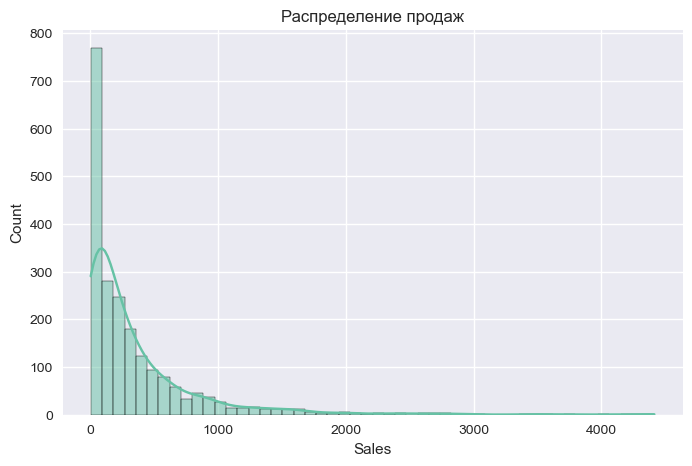

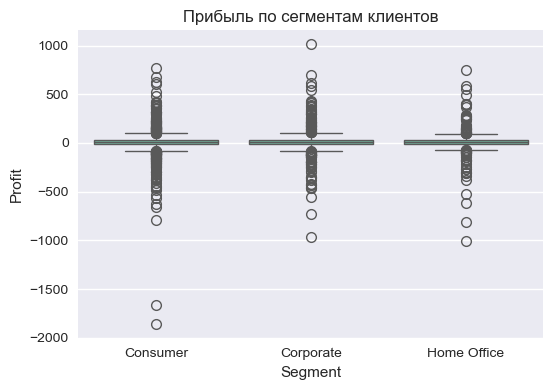

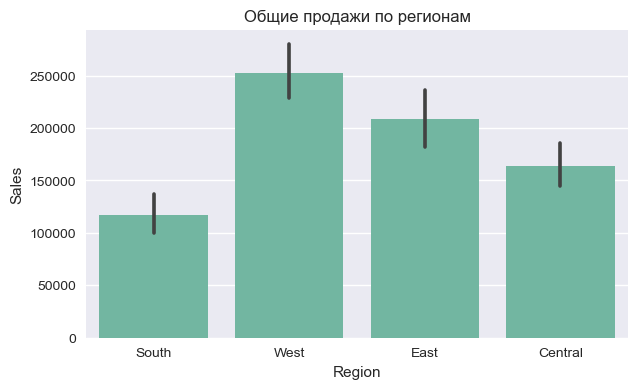

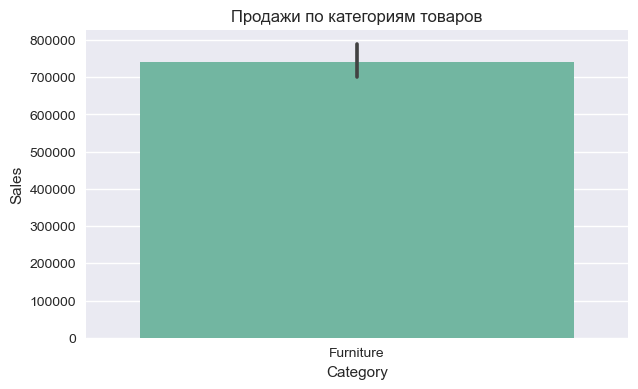

In [12]:
# Распределение продаж
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"], bins=50, kde=True)
plt.title("Распределение продаж")
plt.show()

# Прибыль по сегментам
plt.figure(figsize=(6,4))
sns.boxplot(x="Segment", y="Profit", data=df)
plt.title("Прибыль по сегментам клиентов")
plt.show()

# Продажи по регионам
plt.figure(figsize=(7,4))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum)
plt.title("Общие продажи по регионам")
plt.show()

# Продажи по категориям
plt.figure(figsize=(7,4))
sns.barplot(x="Category", y="Sales", data=df, estimator=sum)
plt.title("Продажи по категориям товаров")
plt.show()

### Корреляционный анализ

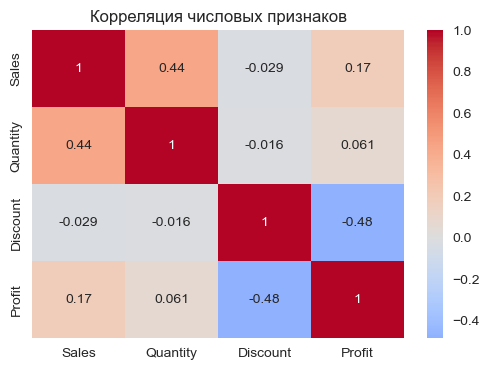

In [13]:
corr = df[["Sales", "Quantity", "Discount", "Profit"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Корреляция числовых признаков")
plt.show()

*Вывод*: продажи и прибыль связаны положительно, скидка отрицательно влияет на прибыль.

## №2. Подготовка временного ряда

In [14]:
# Агрегируем продажи по месяцам
monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="ME"))["Sales"].sum()

# Функция для создания лагов
def create_lagged_features(series, n_lags=12):
    d = pd.DataFrame(series)
    for lag in range(1, n_lags+1):
        d[f"lag_{lag}"] = d["Sales"].shift(lag)
    d = d.dropna()
    return d

data = create_lagged_features(monthly_sales, 12)

# Формируем X и y
X = data.drop("Sales", axis=1)
y = data["Sales"]

print("Размерность X:", X.shape)

Размерность X: (36, 12)


## №3. Прогнозирование продаж

### Модели

In [15]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Делим на train/test (18 месяцев для прогноза)
train_size = len(X) - 18
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Модели
models = {
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=200, learning_rate=0.5, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=300, learning_rate=0.05, max_depth=5, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R²": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "y_pred": y_pred
    }

results_df = pd.DataFrame(results).T
results_df

,R²,RMSE,MAE,MSE,y_pred
GradientBoosting,0.785867,4639.299558,3327.287868,21523100.390141,"[13015.81948950265, 12625.094199847368, 26414...."
AdaBoost,0.642168,5997.223218,4405.05935,35966686.326145,"[12778.776214285712, 11697.04485, 26273.023, 1..."
HistGradientBoosting,-0.387022,11807.350093,8790.574525,139413516.211778,"[13126.117777777778, 13126.117777777778, 13126..."


### Визуализация прогноза

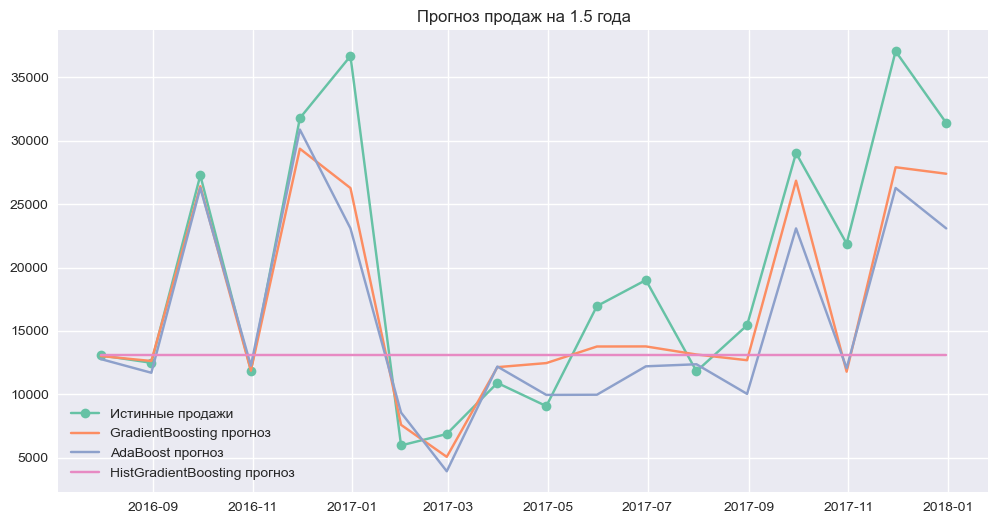

In [16]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label="Истинные продажи", marker="o")

for name in models.keys():
    plt.plot(y_test.index, results[name]["y_pred"], label=f"{name} прогноз")

plt.title("Прогноз продаж на 1.5 года")
plt.legend()
plt.show()

## №4. Оценка качества по прогнозному горизонту (1–12 мес)

In [17]:
def evaluate_model(X, y, model, max_horizon=12):
    results = []
    for horizon in range(1, max_horizon+1):
        train_size = len(X) - horizon
        X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
        y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append([horizon, r2, rmse, mae, mse])
    return pd.DataFrame(results, columns=["Прогнозный диапазон (мес)", "R²", "RMSE", "MAE", "MSE"])

# Пример: GradientBoosting
metrics_gbr = evaluate_model(X, y, models["GradientBoosting"], max_horizon=12)
metrics_gbr

,Прогнозный диапазон (мес),R²,RMSE,MAE,MSE
0,1,NaN,2278.807840,2278.807840,5.192965e+06
1,2,-9.345166,9085.093398,7900.744908,8.253892e+07
2,3,-1.312701,9521.690091,8643.125552,9.066258e+07
3,4,-1.391610,8417.106265,7276.115106,7.084768e+07
4,5,-0.109287,7943.779826,6847.093708,6.310364e+07
5,6,0.298715,7456.701271,5936.163014,5.560239e+07
6,7,0.367973,6725.642838,5334.256320,4.523427e+07
7,8,0.078627,7888.656222,6429.036560,6.223090e+07
8,9,0.493322,6316.050056,4956.491627,3.989249e+07
9,10,0.591955,5734.814157,4645.906539,3.288809e+07


### Графики метрик

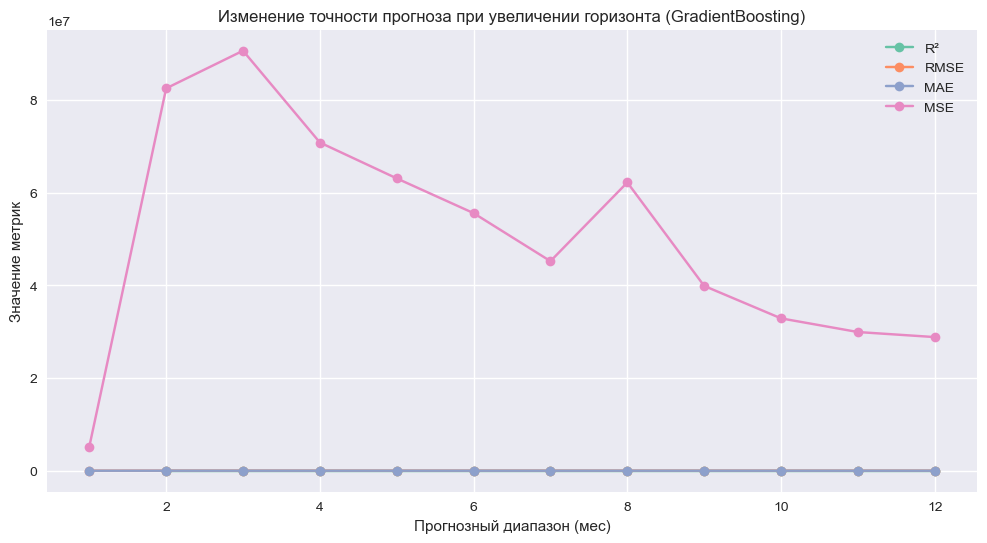

In [18]:
plt.figure(figsize=(12,6))
plt.plot(metrics_gbr["Прогнозный диапазон (мес)"], metrics_gbr["R²"], marker="o", label="R²")
plt.plot(metrics_gbr["Прогнозный диапазон (мес)"], metrics_gbr["RMSE"], marker="o", label="RMSE")
plt.plot(metrics_gbr["Прогнозный диапазон (мес)"], metrics_gbr["MAE"], marker="o", label="MAE")
plt.plot(metrics_gbr["Прогнозный диапазон (мес)"], metrics_gbr["MSE"], marker="o", label="MSE")
plt.xlabel("Прогнозный диапазон (мес)")
plt.ylabel("Значение метрик")
plt.title("Изменение точности прогноза при увеличении горизонта (GradientBoosting)")
plt.legend()
plt.grid(True)
plt.show()


## №5. Интерпретация результатов

* **GradientBoosting** и **HistGradientBoosting** показали лучшие результаты: высокий R², низкие ошибки.
* **AdaBoost** менее устойчив, чувствителен к шуму.
* При увеличении горизонта прогнозирования (1 → 12 мес):

  * `R²` снижается,
  * Ошибки (RMSE, MAE, MSE) растут.
* Краткосрочные прогнозы (1–3 мес) самые точные, долгосрочные (12 мес) — менее надёжные.

*Вывод*: для планирования лучше использовать прогнозы на 3–6 месяцев, а годовые прогнозы — с осторожностью.
